# Tulajdoni hányad adat tisztítás

In [1]:
#Csomag importok és input mappa ellenőrzése

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy  as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
import re
import sklearn
import math

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from pandas import DataFrame , read_csv

import seaborn as sns

%pylab inline

%matplotlib inline

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))


for f in os.listdir('../input'):
    print (f.ljust(30)+ str(round(os.path.getsize('../input/' + f), 2)) + ' Byte')

# Any results you write to the current directory are saved as output.

Populating the interactive namespace from numpy and matplotlib
th.csv                        138305 Byte


In [2]:
# Getting Data from CSV files
# Reading the csv file into a dataframe

# Szemrevételezés

df = pd.read_csv('../input/th.csv')
df.head(100)

,arveres_id,tetel_tulajdoni_hanyad
0,308084,1/6
1,308085,1/1
2,308087,2/2
3,308625,1/2+1/2 (összesen: 2
4,309448,1/1
5,309596,1/1
6,309658,1/1
7,309707,1/1
8,309793,1/1
9,310725,1/1


In [3]:
# a 11. sortól értékes df
df.info()

print(40*'_')

df[11:].info()
# Few of the Points from the summary include 
#  1. The dataframe has 2 columns 
#  2. The 0-10 rows replay from 11-th row 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 2 columns):
arveres_id                10044 non-null object
tetel_tulajdoni_hanyad    10044 non-null object
dtypes: object(2)
memory usage: 157.0+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10033 entries, 11 to 10043
Data columns (total 2 columns):
arveres_id                10033 non-null object
tetel_tulajdoni_hanyad    10033 non-null object
dtypes: object(2)
memory usage: 156.8+ KB


# "Hátulról darabolós" kiértékelés
A "tetel_tulajdoni_hanyad" stringjeit hátulról karakterenként rövidítve addig daraboljuk, amíg 
az eval() int, vagy float értéket ad vissza. Addigra már levágtuk a betűket, a .?!:*_ ... jeleket, mert általában az eleje 
használható. De a végéről közelítünk.

Ha így nem sikerül, akkor még megnézzük, hogy szerepel-e benne 1/1. Valahogy meg kellene különböztetni,hogy 1/1 # 1/100, ...






In [4]:
# 1. funcion: eval() "tetel_tulajdoni_hanyad") hátulról darabolós kiértékelés kiértékelhetőségig
#    ha sikerül, akkor !=0 értéket ad vissza, egyébként None

#betűk, írásjelek kitakarításához
abc    ='aábcdeéfghiíjklmnoóöőpqrstuúüűxyvz'
punct  ='.?!:*_'
#1. A zárójelek kitakarítása szomszédos szám összevonási problémákat okozhat.
#2. A szóközök benthagyása megtartja a tagoltságot és megakadályozza a nemkívánatos szomszédos szám összevonódásokat.
#   Az eval pedig érzéketlen a szóközökre, így még jó is a tagolás megtartása. 

abc_punct    =abc+abc.upper()+punct
#abc_punct_set=set(abc+abc.upper()+punct)


def th_replace(tth_replace):
    '''
    String tisztítása a szükségtelen jelektől
    Attention! String Replace makes a copy.
    '''
    #replace '-' to '+', ill. ',' to '+' a rögzítési szokás megfigyelés alapján
    #néha a résztulajdonokat kötőjelekkel, vagy vesszővel tagoltan sorolják fel,
    #van, hogy szóközökkel tagolnak és van, hogy nem
    
    th_cleared=tth_replace.strip().replace('-','+').replace(',',' ')
    #th_cleared=tth_replace.strip().replace('-','+').replace(',','+')
    

    #betűk, írásjelek kitakarítása: csak a set(string) sorozat betűin megyünk végig
    for p in set(th_cleared):
        if p in abc_punct:
        # if th_cleared.count(p)>=1:
            
            #String Replace makes a copy
            th_cleared=th_cleared.replace(p,'')
    
            #print(th_cleared, p)
        
    return th_cleared.strip()


def eval_th_more(teval_th_more):
    '''
    1/1-es kiértékelő function: return value (float)
    '''
    #eval_th_more_replaced=teval_th_more

    #a tisztítás már megtörtént, a tisztított feature felhasználásával kreáljuk az eval_th - t
    #eval_th_more_replaced=th_replace(teval_th_more)    

    eval_th_more_replaced=teval_th_more    
    eval_th_more_value   =None

    #egyre csökkenő hosszúságú sztring kiértékelése
    for x in range(len(eval_th_more_replaced),0,-1):
        #print(eval_th_more_replaced[0:x])
        try:
            #eval próba
            eval_th_more_value_01=eval(eval_th_more_replaced[0:x])

            if isinstance(eval_th_more_value_01, (int, float)):
                #int/float az eredmény kötőjel miatt néha negatív lesz, ezért abs()
                #bár a - jelet + jelre cseréltük már
                
                eval_th_more_value=abs(eval_th_more_value_01)

                break
                #pass

            else:
                #ha a kiértékelés eredménye True/False (pl. 1/4+1/4=1/2 is kiértékelhető)
                #folytassuk tovább

                continue
                #pass

        except:
            #ha eval hibára fut, akkor folytassuk a darabolást
            
            continue
            #pass

    # ha nem sikerült kiértékelni, vagy értéke > 1, de van benne 1/1, akkor = 1.0
    
    if eval_th_more_value is None:
        # az string eleje kiértékelhetetlen volt, de ...
        
        if '1/1' in eval_th_more_replaced:
        #if eval_th_more_replaced.count('1/1')>=1:
            #ha '1/1' string szerepel benne, akkor OK
            eval_th_more_value=1.0
            
    elif eval_th_more_value > 1:
        #valszeg hibás rögzítések, de ... 
        if '1/1' in eval_th_more_replaced:
        #if eval_th_more_replaced.count('1/1')>=1:
            #ha '1/1' string szerepel benne, akkor OK
            eval_th_more_value=1.0
   
            
    #print(eval_th_more_value)
        
    return eval_th_more_value


def eval_th_more_doubleret(teval_th_more):
    '''
    1/1-es kiértékelő function: return (value, quality) (tuple)
    '''
    #eval_th_more_replaced=teval_th_more

    #a tisztítás már megtörtént, a tisztított feature felhasználásával kreáljuk az eval_th - t
    #eval_th_more_replaced=th_replace(teval_th_more)    

    eval_th_more_replaced=teval_th_more    
    eval_th_more_value   =None
    eval_th_more_quality =None

    #egyre csökkenő hosszúságú sztring kiértékelése
    for x in range(len(eval_th_more_replaced),0,-1):
        #print(eval_th_more_replaced[0:x])
        try:
            #eval próba
            eval_th_more_value_01=eval(eval_th_more_replaced[0:x])

            if isinstance(eval_th_more_value_01, (int, float)):
                #int/float az eredmény kötőjel miatt néha negatív lesz, ezért abs()
                #bár a - jelet + jelre cseréltük már
                
                eval_th_more_value   =abs(eval_th_more_value_01)
                eval_th_more_quality =1


                break
                #pass

            else:
                #ha a kiértékelés eredménye True/False (pl. 1/4+1/4=1/2 is kiértékelhető)
                #folytassuk tovább

                continue
                #pass

        except:
            #ha eval hibára fut, akkor folytassuk a darabolást
            
            continue
            #pass

    # ha nem sikerült kiértékelni, vagy értéke > 1, de van benne 1/1, akkor = 1.0
    
    if eval_th_more_value is None:
        # az string eleje kiértékelhetetlen volt, de ...
        
        if '1/1' in eval_th_more_replaced:
        #if eval_th_more_replaced.count('1/1')>=1:
            #ha '1/1' string szerepel benne, akkor OK
            eval_th_more_value   =1.0
            eval_th_more_quality =2
            
            
    elif eval_th_more_value > 1:
        #valszeg hibás rögzítések, de ... 
        if '1/1' in eval_th_more_replaced:
        #if eval_th_more_replaced.count('1/1')>=1:
            #ha '1/1' string szerepel benne, akkor OK
            eval_th_more_value   =1.0
            eval_th_more_quality =3

            
    #print(eval_th_more_value)
        
    return (eval_th_more_value, eval_th_more_quality)


def th_replace_devider(tth_replace):
    '''A lecsupaszított th_replace-ból megkeresi az első / jel utáni első osztót'''
    
    th_replace_devider  =tth_replace.replace('=','+')
    th_replace_devider_int=None

    if '/' in th_replace_devider:
        th_replace_devider_sep01=th_replace_devider.split('+')

        for x in th_replace_devider_sep01:
            x_01=x.split('/')

            if len(x_01)==2 and x_01[1].isnumeric():
                th_replace_devider_int=int(x_01[1].strip())

                break
    
    return th_replace_devider_int


#Nem használt metódus
#def eval_th_str(teval_th):
#    '''
#    Int és float értékből 1/x string képzése
#    '''
#
#    eval_th_str_ret=None
#    
#    if not None is teval_th and isinstance(teval_th, (int, float)):
#        eval_th_str=int(round(1/teval_th,0)+.5)
#        
#        eval_th_str_ret='1/'+str(eval_th_str)
#        #eval_th_str_ret='1/'+str(int(eval_th_str))
# 
#    return eval_th_str_ret




In [5]:
# 2.1 új feature: 'th_cleared': a 'tetel_tulajdoni_hanyad' megtisztítása a nem kívánatos jelektől 
df['th_cleared'] = df['tetel_tulajdoni_hanyad'].apply(th_replace,args=())


In [6]:
# 2.2 új feature: 'eval_th_dbl':  a kiértékelés az (érték, minőség) tuple-t adja vissza
df['eval_th_dbl'] = df['th_cleared'].apply(eval_th_more_doubleret)


In [7]:
# 2.3 új feature: 'eval_th_value': a tuple 0. dimenzióból feltöltve
df['eval_th_value'] =df.eval_th_dbl.map(lambda x: x[0])


In [8]:
# 2.4 új feature: 'eval_th_quality': a tuple 1. dimenzióból feltöltve 
df['eval_th_quality'] =df.eval_th_dbl.map(lambda x: x[1])


In [9]:
# 2.5 új feature: 'th_str_div': a hányados osztójának keresése
df['th_str_div'] = df['th_cleared'][df['eval_th_value'].notnull()].apply(th_replace_devider)


In [10]:
# 2.6 új feature: 'th_str_dvd': a hányados osztandójának származtatása

#Series.multiply(other, level=None, fill_value=None, axis=0)[source]

df['th_str_dvd'] = df['eval_th_value'][df['eval_th_value'].notnull()].multiply(df['th_str_div'][df['eval_th_value'].notnull()])


In [11]:
# 2.7 új feature: 'th_eval_str': x/y tulajdoni hányad string újra generálása

df['th_eval_str'] = df['th_str_dvd'][df['th_str_dvd'].notnull()].astype(int).astype(str) + \
    '/'+ \
    df['th_str_div'][df['th_str_div'].notnull()].astype(int).astype(str)

# 2/2, 8/8, ... 1/1 - esítése kellene még
#df['th_eval_str']=

In [12]:
# 2.2 új feature: 'eval_th': a kiértékelés eredménye, az érték minőségét nem adja vissza

# Első változatban ez szerepelt, de az érték minőségét nem adja vissza.

#df['eval_th'] = df['th_cleared'].apply(eval_th_more)


In [13]:
# adat típus konvertálás: csak a műveletekben használható, nem marad meg az új típus

# több feature konvertálása
#df.astype({'th_str_dvd': str,'th_str_div': str})

# egy-egy feature
#df['th_str_dvd'].astype(str)
#df['th_str_div'].astype(str)



In [14]:
# szükségtelen feature-k törlése
#del df['eval_th_dbl']


In [15]:
# 3. lássuk az elejét, mit követtünk el
df.head(100)

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str
0,308084,1/6,1/6,"(0.16666666666666666, 1)",0.166667,1.0,6.0,1.0,1/6
1,308085,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
2,308087,2/2,2/2,"(1.0, 1)",1.000000,1.0,2.0,2.0,2/2
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,"(1.0, 1)",1.000000,1.0,2.0,2.0,2/2
4,309448,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
5,309596,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
6,309658,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
7,309707,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
8,309793,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
9,310725,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1


In [16]:
# 3. lássuk a végét: mit követtünk el
df.tail(100)

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str
9944,344865,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
9945,344869,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
9946,344892,11582/1068400,11582/1068400,"(0.010840509172594534, 1)",0.010841,1.0,1068400.0,11582.0,11582/1068400
9947,344893,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
9948,344894,1/2,1/2,"(0.5, 1)",0.500000,1.0,2.0,1.0,1/2
9949,344895,1/4,1/4,"(0.25, 1)",0.250000,1.0,4.0,1.0,1/4
9950,344896,14/24,14/24,"(0.5833333333333334, 1)",0.583333,1.0,24.0,14.0,14/24
9951,344916,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
9952,344940,1/4,1/4,"(0.25, 1)",0.250000,1.0,4.0,1.0,1/4
9953,344941,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1


In [17]:
#valószínűleg hibás rögzítések: egynél nagyobb visszaadott értékek, amik
#  hibásan rögzített törtek,
#  ESETLEG a "tetel_tulajdoni_hanyad" eredetileg rövíd hossz, így a végét nem rögzítették,
#          vagy az átvételkor elégtelen mezőhossz definíció miatt levágtad a végét

df[df['eval_th_value']>1]

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str
177,317864,1/6 + 3/6 + 1/6 + 1/,1/6 + 3/6 + 1/6 + 1/,"(1.8333333333333333, 1)",1.833333,1.0,NaN,NaN,NaN
1424,323922,11/52-11/52-15/52-15,11/52+11/52+15/52+15,"(15.711538461538462, 1)",15.711538,1.0,52.0,817.000000,817/52
2336,326174,30/60+25/60+1/60+1/6,30/60+25/60+1/60+1/6,"(1.1, 1)",1.100000,1.0,60.0,66.000000,66/60
2834,327351,1/4+24+1/4,1/4+24+1/4,"(24.5, 1)",24.500000,1.0,4.0,98.000000,98/4
4358,330950,20/96+19/96+19/96+19,20/96+19/96+19/96+19,"(19.604166666666668, 1)",19.604167,1.0,96.0,1882.000000,1882/96
4367,330976,1/8 + 4/8 + 1/8 + 1/,1/8 + 4/8 + 1/8 + 1/,"(1.75, 1)",1.750000,1.0,NaN,NaN,NaN
5647,333416,1/6 + 3/6 + 1/6 + 1/,1/6 + 3/6 + 1/6 + 1/,"(1.8333333333333333, 1)",1.833333,1.0,NaN,NaN,NaN
5888,333848,2/4-ed + 1/4-ed + 1/,2/4+ + 1/4+ + 1/,"(1.75, 1)",1.750000,1.0,4.0,7.000000,7/4
6172,334329,3/6 + 1/6 + 1/6 + 1/,3/6 + 1/6 + 1/6 + 1/,"(1.8333333333333333, 1)",1.833333,1.0,NaN,NaN,NaN
7054,335930,481/534+27/534+26/53,481/534+27/534+26/53,"(1.44187689915907, 1)",1.441877,1.0,534.0,769.962264,769/534


In [18]:
#megnézzük, hogy milyenek a ',' tartalmazó szövegek
df[df['tetel_tulajdoni_hanyad'].str.contains(',')].info()
df[df['tetel_tulajdoni_hanyad'].str.contains(',')]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 514 to 9097
Data columns (total 9 columns):
arveres_id                11 non-null object
tetel_tulajdoni_hanyad    11 non-null object
th_cleared                11 non-null object
eval_th_dbl               11 non-null object
eval_th_value             11 non-null float64
eval_th_quality           11 non-null float64
th_str_div                1 non-null float64
th_str_dvd                1 non-null float64
th_eval_str               1 non-null object
dtypes: float64(4), object(5)
memory usage: 880.0+ bytes


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str
514,321111,"1/1, 245/511",1/1 245/511,"(1.0, 1)",1.000000,1.0,NaN,NaN,NaN
1640,324497,"1/1 (II/5.,6.)",1/1 (/5 6),"(1.0, 1)",1.000000,1.0,NaN,NaN,NaN
2578,326769,"1/2+1/2, összevont 1",1/2+1/2 1,"(1.0, 1)",1.000000,1.0,2.0,2.0,2/2
2610,326854,"1/4, 1/4",1/4 1/4,"(0.25, 1)",0.250000,1.0,NaN,NaN,NaN
3216,328261,"3/8 (II/12,13)",3/8 (/12 13),"(0.375, 1)",0.375000,1.0,NaN,NaN,NaN
3359,328678,"10/60 (II/8.,14)",10/60 (/8 14),"(0.16666666666666666, 1)",0.166667,1.0,NaN,NaN,NaN
4875,331994,"1/2 (II/29,30.)",1/2 (/29 30),"(0.5, 1)",0.500000,1.0,NaN,NaN,NaN
5631,333385,"18/24, 3/24, 3/24",18/24 3/24 3/24,"(0.75, 1)",0.750000,1.0,NaN,NaN,NaN
7207,336382,"1/1 (II/8,9)",1/1 (/8 9),"(1.0, 1)",1.000000,1.0,NaN,NaN,NaN
8286,339031,"5/20, 5/20",5/20 5/20,"(0.25, 1)",0.250000,1.0,NaN,NaN,NaN


In [19]:
#megnézzük, hogy milyenek a '=' tartalmazó szövegek
df[df['tetel_tulajdoni_hanyad'].str.contains('=')].info()
df[df['tetel_tulajdoni_hanyad'].str.contains('=')]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 27 to 10028
Data columns (total 9 columns):
arveres_id                635 non-null object
tetel_tulajdoni_hanyad    635 non-null object
th_cleared                635 non-null object
eval_th_dbl               635 non-null object
eval_th_value             635 non-null float64
eval_th_quality           635 non-null float64
th_str_div                617 non-null float64
th_str_dvd                617 non-null float64
th_eval_str               617 non-null object
dtypes: float64(4), object(5)
memory usage: 49.6+ KB


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str
27,311323,1/2+1/2=1/1,1/2+1/2=1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,2/2
28,311324,1/2+1/2=1/1,1/2+1/2=1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,2/2
29,311325,1/2+1/2=1/1,1/2+1/2=1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,2/2
48,314326,1/2+1/2=1/1,1/2+1/2=1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,2/2
61,315255,1/2 + 1/2 = 1/1,1/2 + 1/2 = 1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
69,315604,1/2 + 1/2 = 1/1,1/2 + 1/2 = 1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
104,316345,1/2 + 1/2 = 1/1,1/2 + 1/2 = 1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
133,316897,1/2-1/2=1/1,1/2+1/2=1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,2/2
198,318103,1/2+1/2=1/1,1/2+1/2=1/1,"(1.0, 1)",1.000000,1.0,2.0,2.0,2/2
212,318256,1/2 + 1/2 = 1/1,1/2 + 1/2 = 1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1


In [20]:
#eval_th_quality=1: numerikusan kiértékelhető a 'tetel_tulajdoni_hanyad' eleje,

#eval_th_quality=2: nem volt kiértékelhető a 'tetel_tulajdoni_hanyad' eleje, de tartalmazott 1/1 jelsort
#eval_th_quality=3: kiértékelhető volt a 'tetel_tulajdoni_hanyad' eleje és > 1 volt az értéke, de tartalmazott 1/1 jelsort

df[df['eval_th_quality']>0]

,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str
0,308084,1/6,1/6,"(0.16666666666666666, 1)",0.166667,1.0,6.0,1.0,1/6
1,308085,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
2,308087,2/2,2/2,"(1.0, 1)",1.000000,1.0,2.0,2.0,2/2
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,"(1.0, 1)",1.000000,1.0,2.0,2.0,2/2
4,309448,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
5,309596,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
6,309658,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
7,309707,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
8,309793,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1
9,310725,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1


In [21]:
#kiértékelhetetlen sorok

df[df['eval_th_value'].isnull()]


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str
10,arveres_id,tetel_tulajdoni_hanyad,,"(None, None)",NaN,NaN,NaN,NaN,NaN
129,316714,adós,,"(None, None)",NaN,NaN,NaN,NaN,NaN
972,322817,-,+,"(None, None)",NaN,NaN,NaN,NaN,NaN
3258,328417,-,+,"(None, None)",NaN,NaN,NaN,NaN,NaN
9992,345156,TESZT,,"(None, None)",NaN,NaN,NaN,NaN,NaN
9993,345161,TESZT,,"(None, None)",NaN,NaN,NaN,NaN,NaN


In [22]:
#kiértékelhetetlen sorok leírása

df[df['eval_th_value'].isnull()].describe()


,eval_th_value,eval_th_quality,th_str_div,th_str_dvd
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [23]:
df[df['eval_th_value'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 10 to 9993
Data columns (total 9 columns):
arveres_id                6 non-null object
tetel_tulajdoni_hanyad    6 non-null object
th_cleared                6 non-null object
eval_th_dbl               6 non-null object
eval_th_value             0 non-null float64
eval_th_quality           0 non-null float64
th_str_div                0 non-null float64
th_str_dvd                0 non-null float64
th_eval_str               0 non-null object
dtypes: float64(4), object(5)
memory usage: 480.0+ bytes


In [24]:
#valószínűleg hibás rögzítések
df[df['eval_th_value']>1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 177 to 9233
Data columns (total 9 columns):
arveres_id                12 non-null object
tetel_tulajdoni_hanyad    12 non-null object
th_cleared                12 non-null object
eval_th_dbl               12 non-null object
eval_th_value             12 non-null float64
eval_th_quality           12 non-null float64
th_str_div                8 non-null float64
th_str_dvd                8 non-null float64
th_eval_str               8 non-null object
dtypes: float64(4), object(5)
memory usage: 960.0+ bytes


In [25]:
#valószínűleg hibás rögzítések
df[df['eval_th_value']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6570 entries, 1 to 10043
Data columns (total 9 columns):
arveres_id                6570 non-null object
tetel_tulajdoni_hanyad    6570 non-null object
th_cleared                6570 non-null object
eval_th_dbl               6570 non-null object
eval_th_value             6570 non-null float64
eval_th_quality           6570 non-null float64
th_str_div                6359 non-null float64
th_str_dvd                6359 non-null float64
th_eval_str               6359 non-null object
dtypes: float64(4), object(5)
memory usage: 513.3+ KB


In [26]:
df['eval_th_value'].unique()

array([  1.66666667e-01,   1.00000000e+00,              nan,
         5.00000000e-01,   2.50000000e-01,   1.42857143e-01,
         2.72727273e-01,   3.57142857e-02,   9.00000000e-01,
         3.75000000e-01,   7.00000000e-01,   6.66666667e-01,
         7.07930368e-01,   2.00000000e-01,   4.40487348e-02,
         1.83333333e+00,   3.33333333e-01,   7.08333333e-01,
         1.00000000e-01,   5.00098251e-01,   4.76190476e-02,
         2.10000000e-01,   8.33333333e-02,   2.64445755e-01,
         7.50000000e-01,   6.00000000e-01,   4.00000000e-01,
         1.00000000e+00,   4.64285714e-01,   1.25000000e-01,
         3.24155194e-01,   1.38029112e-02,   5.29010239e-02,
         4.60800000e-01,   2.81250000e-01,   7.25000000e-01,
         5.50000000e-02,   8.79166667e-01,   1.38339921e-02,
         1.46533974e-01,   4.44444444e-01,   5.55555556e-02,
         3.88888889e-01,   2.77777778e-02,   7.81250000e-03,
         3.24098036e-01,   6.25000000e-02,   1.81490000e-01,
         3.09523810e-01,

In [27]:
len(df['eval_th_value'].unique())

320

In [28]:
# df['eval_th_value'].fillna(df['tetel_tulajdoni_hanyad'].apply(eval_th_more))

In [29]:
df[df['eval_th_value'].isnull()]


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str
10,arveres_id,tetel_tulajdoni_hanyad,,"(None, None)",NaN,NaN,NaN,NaN,NaN
129,316714,adós,,"(None, None)",NaN,NaN,NaN,NaN,NaN
972,322817,-,+,"(None, None)",NaN,NaN,NaN,NaN,NaN
3258,328417,-,+,"(None, None)",NaN,NaN,NaN,NaN,NaN
9992,345156,TESZT,,"(None, None)",NaN,NaN,NaN,NaN,NaN
9993,345161,TESZT,,"(None, None)",NaN,NaN,NaN,NaN,NaN


In [30]:
# új feature: 'th_1_per_1': 1/1 jellemzőre

#df['th_tiszta'] = df["eval_th_value"].apply(lambda x: df["tetel_tulajdoni_hanyad"] if x == 1 else '')

#df.loc[df['eval_th_value'] == 0, 'th_tisztitando'] = df["tetel_tulajdoni_hanyad"]

#df.loc[df['eval_th_value'] != 0, 'th_tiszta'] = df["tetel_tulajdoni_hanyad"]



#néhány 1-nél nagyobb, lehet, hogy jó lenne még 1/1-nek, de további kiértékelés kellene
df['th_1_per_1'] = df["eval_th_value"].apply(lambda x: 1 if x == 1 else 0)

df.head(100)


,arveres_id,tetel_tulajdoni_hanyad,th_cleared,eval_th_dbl,eval_th_value,eval_th_quality,th_str_div,th_str_dvd,th_eval_str,th_1_per_1
0,308084,1/6,1/6,"(0.16666666666666666, 1)",0.166667,1.0,6.0,1.0,1/6,0
1,308085,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
2,308087,2/2,2/2,"(1.0, 1)",1.000000,1.0,2.0,2.0,2/2,1
3,308625,1/2+1/2 (összesen: 2,1/2+1/2 ( 2,"(1.0, 1)",1.000000,1.0,2.0,2.0,2/2,1
4,309448,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
5,309596,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
6,309658,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
7,309707,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
8,309793,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1
9,310725,1/1,1/1,"(1.0, 1)",1.000000,1.0,1.0,1.0,1/1,1


In [31]:
#valószínűleg hibás rögzítések
df[df['th_1_per_1']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6570 entries, 1 to 10043
Data columns (total 10 columns):
arveres_id                6570 non-null object
tetel_tulajdoni_hanyad    6570 non-null object
th_cleared                6570 non-null object
eval_th_dbl               6570 non-null object
eval_th_value             6570 non-null float64
eval_th_quality           6570 non-null float64
th_str_div                6359 non-null float64
th_str_dvd                6359 non-null float64
th_eval_str               6359 non-null object
th_1_per_1                6570 non-null int64
dtypes: float64(4), int64(1), object(5)
memory usage: 564.6+ KB


In [32]:
#valószínűleg hibás rögzítések
df[df['th_1_per_1']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3474 entries, 0 to 10039
Data columns (total 10 columns):
arveres_id                3474 non-null object
tetel_tulajdoni_hanyad    3474 non-null object
th_cleared                3474 non-null object
eval_th_dbl               3474 non-null object
eval_th_value             3468 non-null float64
eval_th_quality           3468 non-null float64
th_str_div                3406 non-null float64
th_str_dvd                3406 non-null float64
th_eval_str               3406 non-null object
th_1_per_1                3474 non-null int64
dtypes: float64(4), int64(1), object(5)
memory usage: 298.5+ KB


In [33]:
#valószínűleg hibás rögzítések
df[df['th_1_per_1'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
arveres_id                0 non-null object
tetel_tulajdoni_hanyad    0 non-null object
th_cleared                0 non-null object
eval_th_dbl               0 non-null object
eval_th_value             0 non-null float64
eval_th_quality           0 non-null float64
th_str_div                0 non-null float64
th_str_dvd                0 non-null float64
th_eval_str               0 non-null object
th_1_per_1                0 non-null int64
dtypes: float64(4), int64(1), object(5)
memory usage: 0.0+ bytes


In [34]:
df['th_1_per_1'].unique()


array([0, 1], dtype=int64)

In [35]:
# Testing the function value counts
df['th_1_per_1'].value_counts()

1    6570
0    3474
Name: th_1_per_1, dtype: int64

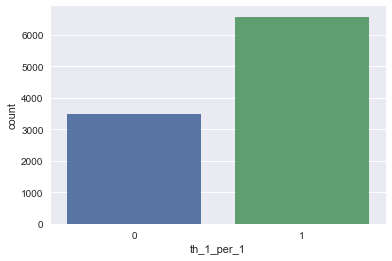

In [36]:
#sns.countplot(df['th_1_per_1'])
sns.countplot(df.th_1_per_1)


In [37]:
#pd.tools.plotting.radviz(df, 'eval_th_value')


In [38]:
df[11:][['arveres_id','th_1_per_1','th_eval_str','eval_th_quality']]
#df[11:][['arveres_id','th_1_per_1','eval_th_value','eval_th_quality','th_eval_str']]

,arveres_id,th_1_per_1,th_eval_str,eval_th_quality
11,308084,0,1/6,1.0
12,308085,1,1/1,1.0
13,308087,1,2/2,1.0
14,308625,1,2/2,1.0
15,309448,1,1/1,1.0
16,309596,1,1/1,1.0
17,309658,1,1/1,1.0
18,309707,1,1/1,1.0
19,309793,1,1/1,1.0
20,310725,1,1/1,1.0


In [39]:
submission = pd.DataFrame({
        'arveres_id': df[11:]['arveres_id'],
        'th_1_per_1': df[11:]['th_1_per_1'].astype(int),
        'th_eval_str': df[11:]['th_eval_str'],
        'eval_th_quality': df[11:]['eval_th_quality']    
    })
submission.to_csv('th_ok.csv', index=False)



# Tanulmány kódok



In [ ]:
print(eval('1/2+1/2'))
print(eval('95/100+5/100==1/1'))
print(eval('94/100+5/100==1/1'))

In [ ]:
print([ord('0'), ord('1')])
print(type(ord('1')))
print(isinstance(ord('1'),int))
print(isinstance('1',int))
print(type(eval('1/2+1/2')))

isinstance(eval('1/2+1/2'),float)

In [ ]:
str='012345abc -'
print(str[4].isdigit())

In [ ]:
str='012345abc -'
str is None

In [ ]:
#tanulmány a hátulról vagdosva haladós kiértékeléshez

a="1 / 3 + 1/ 3 = 2/3 (mi lesz ebből"
print(len(a))
a[0:len(a)-1]
[x for x in range(len(a),0,-1)]
b=a.strip(' ')
#print(a, b)
for x in range(len(b),0,-1):
    #print(b[0:x])
    try:
        #ha '1/1' string szerepel benne, akkor eleve OK-nak vesszük
        eval_th_value_01=eval(b[0:x])

        if isinstance(eval_th_value_01, (int, float)):
            #int/float az eredmény kötőjel miatt néha negatív lesz, ezért abs()
            print([b[0:x],abs(eval_th_value_01)])
            #print(abs(eval_th_value_01))
            break

        else:
            #ha a kiértékelés eredménye True/False (pl. 1/4+1/4=1/2 is kiértékelhető)
            print([b[0:x],abs(eval_th_value_01)])

            pass

    except:
        #num_eval_th=0
        print([b[0:x],"Nem OK"])
        pass

    


In [ ]:
a="1 / 3 - 1/ 3 = 2/3 (mi lesz ebből"
list(a)
a.strip()
a.lstrip()
a.replace(' ','').replace('-',' +').replace('+',' + ').replace('=',' = ').split()
b=a.replace('-',' +').replace('+',' + ').replace('=',' = ').replace(' ','')
#a.replace(' ','').replace('-','+')
#a.replace(' -','-')
#list(a.replace(' ',''))
#len(set(a))
#b[:b.find('=')].split('+')
print(b[:b.find('=')])
b[:b.find('=')].count('/')
eval(b[:b.find('=')])

In [ ]:
a="1 / 3 + 1/ 3 = 2/3 (mi lesz ebből"
a.split(' ')

In [ ]:
from string import punctuation
print(punctuation)


In [ ]:
tweet="1 / 3 + 1/ 3 = 2/3 (mi lesz ebből"
tweet_processed=tweet.lower()
for p in list(punctuation):
    tweet_processed=tweet_processed.replace(p,'')
print(tweet_processed)    

In [ ]:
a='1/2+1/2 (összesen: 2*+-'
print(th_replace(a))

In [ ]:
import urllib
'''
url='http://www.unc.edu/~ncaren/haphazard/negative.txt'
file_name='negative.txt'
urllib.urlretrieve(url,file_name)

urllib.urlretrieve('http://www.unc.edu/~ncaren/haphazard/negative.txt','negative.txt')
'''
files=['negative.txt','positive.txt','obama_tweets.txt']
path='http://www.unc.edu/~ncaren/haphazard/'
for file_name in files:
    urllib.request.urlopen(path+file_name,file_name)


In [ ]:
tweets = open("obama_tweets.txt").read()
tweets_list = tweets.split('\n')
len(tweets_list)

for tweet in tweets_list[0:5]:
    print(tweet)

In [ ]:
abc  ='aábcdeéfghiíjklmnoóöőpqrstuúüűxyvz'
punct='.?!:*_'

tweet="1 / 3 + 1/ 3 = 2/3 (mi lesz ebből.*?!"

abc_set      =set(abc)
punct_set    =set(punct)

abc_punct_set=set(abc+abc.upper()+punct)

tweet_set    =set(tweet)

for p in tweet_set:
    if p in abc_punct_set:
        print(p)


In [ ]:
abc  ='aábcdeéfghiíjklmnoóöőpqrstuúüűxyvz'
punct='.?!:*_'

tweet="1 / 3 + 1/ 3 = 2/3 (mi lesz ebből.*?!".replace(' ','')

if '/' in tweet:

    print(tweet)
    
    pos=tweet.find('/')
    for i in range(pos+1,len(tweet)-(pos-1)):
        #print(tweet[i:i+1])
        if ' ' in tweet[i] or tweet[i].isnumeric():
            #print(tweet[i:i+1])
            pass
        else:
            break
   
    #print(i)
    print(int(tweet[pos+1:i].strip()))
        #print(tweet.find('/'))
        #print(tweet[tweet.find('/')])
    
    
    #for p in tweet_set:
    #    if p in abc_punct_set:
    #        print(p)


In [ ]:
abc  ='aábcdeéfghiíjklmnoóöőpqrstuúüűxyvz'
punct='.?!:*_'

#tweet="1 / 3 + 1/ 3 + 1/3= 3/3 (mi lesz ebből.*?!".replace(' ','').replace('=','+')
tweet="1 / 3 sz ebből.*?!".replace(' ','').replace('=','+')

if '/' in tweet:

    tweet_sep01=tweet.split('+')
    
    tweet_devider=None
    
    for x in tweet_sep01:
        x_01=x.split('/')
        
        #print([x_01, len(x_01)])
        
        if len(x_01)==2 and x_01[1].isnumeric():
            tweet_devider=int(x_01[1].strip())
            
            break
            
    
    
    
    
    print([tweet, tweet_sep01, tweet_devider])
    
    #pos=tweet.find('/')

    #print(tweet[pos+1:pos+3].strip())


In [ ]:
th_replace_devider(th_replace("1 / 3 + 1/ 3 = 2/3 (mi lesz ebből.*?!"))

In [ ]:
[x for x in range(2,3)]

In [ ]:
num_ertek=0.1666666

eval_th_str=int(round(1/num_ertek,0)+.5)
#eval_th_str=round(1/num_ertek,0)
     
eval_th_str_ret='1/'+str(eval_th_str)

print([eval_th_str,eval_th_str_ret])

#print(int(5.99+.5))


In [ ]:
teszt=pd.DataFrame({'A':[(1,2),(3,4),(5,6)]})
print(teszt)
#teszt.values
#print(teszt['A'][0][0])
#teszt['A'][0 : ]
print(teszt.A.map(lambda x: x[0]))
#print(teszt.A)

In [ ]:
teszt=pd.DataFrame({'A':[(1,2),(3,4),(5,6)]})
print(teszt)
print(teszt.A.map(lambda x: x[0]))

In [ ]:
teszt=pd.DataFrame({'A':['a','b','c']})
#print(teszt)
#print(teszt.A.map(lambda x: x[0]))
teszt.A+'/'+teszt.A
(teszt.A+'/').add(teszt.A)



# Tanulmány kódok vége



# További próbálkozások, tanulmányok

In [ ]:
# sorting the data acording to highest satisfaction level
sort = df[11:].sort_values(['tetel_tulajdoni_hanyad'], ascending = False)
sort.head(20)

In [ ]:
# printing the employee number with the hughest average monthly hours
sort = df.sort_values(['tetel_tulajdoni_hanyad'] , ascending = True)
sort.head(100)

In [ ]:
df['th_1_per_1'].sum(axis=0)

In [ ]:
df.describe()
#df.count()
#pd.value_counts()


In [ ]:
# Method 2: To simply print out the maximum value of eval_th by simply 
# accessing the column in the dataset

[df['eval_th'].min(), df['eval_th'].max()]

In [ ]:
# To print the tetel_tulajdoni_hanyad associated with the highest eval_th
df['tetel_tulajdoni_hanyad'][df['eval_th']==df['eval_th'].max()]

In [ ]:
# Creating a graph of the eval_th
ax = df['eval_th'].plot()
#print(ax)
ax.set_xlabel('Objektumok')
ax.set_ylabel('eval_th')


In [ ]:
# To print the unique values of the column sales
df['eval_th'].unique()
# To print them as a list
for x in df['eval_th'].unique():
    print(x)

In [ ]:
df.sort_values(['eval_th'] , ascending = True)

In [ ]:
# adding a new column to the dataset
df['NewCol'] = 5
df.head()

In [ ]:
# Modifying the value of our new column 
df['NewCol'] = df['NewCol'] * 2
df.head()

In [ ]:
# Deleting the new column
del df['NewCol']
df.head()

In [ ]:
df

In [ ]:
# The "loc" function is used to select pieces of the dataframe.
df.loc[0:20]

In [ ]:
df[0:20][['eval_th','th_1_per_1']]

In [ ]:
df[0:20:2]

In [ ]:
df.loc[21:40]

In [ ]:
# Slicing a part of the dataframe of one column---Location based indexing 
df.ix[0:5,['eval_th','th_1_per_1']]

In [ ]:
# To select bottom records
df.tail()

In [ ]:
# Testing the function value counts
df['eval_th'].value_counts()

In [ ]:
df['tetel_tulajdoni_hanyad'].value_counts()

In [ ]:
df['th_cleared'].value_counts()

In [ ]:
# Testing the function value counts
df['th_1_per_1'].value_counts()

In [ ]:
 #column names to a list
df.columns.tolist()